# Write your first ML model

Whether or not this is actually your first model, we are going to take a look at the
famous MNIST data set of handwritten digits. We are going to use a few different ML libs for this.

## Notebook basics
- Use Enter and Escpace to toggle in and out of cells.
- When you are out you can use 'a' and 'b' to insert a new cell above or below.
- Or you can delete a cell with 'dd'.
- You can run the current cell with shift enter (works in both modes).
- You may prefer alt enter which runs cell and creates a new cell after.

## H2O
Let's start our journey by launching a local H2O cluster with one node.

In [ ]:
import h2o
h2o.init()

## Cheats
Run the cell below to enable skeletons, hints and cheats.
To later use these run skeleton('id'), hint('id') or cheat('id') in any cell.

In [ ]:
from cheat import *

### Exercise (t1w)

Take a quick look at the output from h2o.init() above. Anything particularly interesting?

### Exercise (i7b)

It is time to import some data into our H2O cluster. There are two data files in
the notebook workdirectory.
- Find them and import them into H2O.
- View your result X by putting X last in a cell and run the cell.
- Run X.show() and display(X).
- See if you can view X in the Flow UI.

In [3]:
test = h2o.import_file("data/mnist/mnist.test.csv.gz")
train = h2o.import_file("data/mnist/mnist.train.csv.gz")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


### Exercise (2if)
Find the target column of the two imported frames and convert its datatype to enum.
The conversion is done by the 'asfactor' method. To select a column from a dataframe use square brackets df\[...\]. What goes between brackets can be a column name, number, or a list, however not all combinations will work when assigning columns.

In [4]:
train[-1] = train[-1].asfactor()
test[-1] = test[-1].asfactor()

### Exercise (ot5)

Often one will split off a part of training data into a validation set.
The validation set serves as a proxy for testing models 'in the wild'.
Scores measured on the training set are not reliable as many algorithms produce
perfect or near perfect training scores.
Split the training frame into two parts: train (80% of rows) and valid (remaining 20%).

In [5]:
# Your code here #
train, valid = train.split_frame([0.8])
display(valid.head(3))
display(train.head(3))

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,133,151,254,254,220,93,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,83,254,253,253,253,253,253,253,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,253,254,253,253,253,253,253,253,170,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,253,254,253,206,84,170,242,253,253,24,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,254,254,254,254,255,223,141,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,253,253,253,253,253,253,253,64,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,13,185,197,253,253,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,252,252,253,252,252,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,239,252,252,253,231,141,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,214,252,252,206,222,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,105,105,105,123,253,253,253,253,255,253,156,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,252,252,252,252,252,252,252,252,253,252,252,231,164,18,0,0,0,0,0,0,0,0,0,0,0,0,0,208,252,252,252,252,252,252,252,252,253,252,252,252,252,74,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,210,253,205,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,252,252,252,229,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,252,252,252,253,212,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,91,202,254,254,254,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,60,225,253,253,253,253,253,241,96,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,135,253,253,253,253,253,253,253,253,253,253,32,0,0,0,0,0,0,0,0,0,0,0


## Ploting images

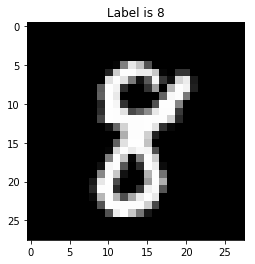

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# converts to pandas dataframe (if pandas is installed)
test_pd = test.as_data_frame()
pixels = test_pd.iloc[:,list(range(0,28*28))]
labels = test_pd.iloc[:,28*28]

def draw_pixels(pixels, labels, num):
    data = np.array(pixels.iloc[num], dtype='uint8')
    data = data.reshape((28, 28))
    plt.title('Label is {label}'.format(label=labels.iloc[num]))
    plt.imshow(data, cmap='gray')
    plt.show()
    
draw_pixels(pixels, labels, 0)

## Finally Machine Learning

We begin with they laziest way, throwing the data into a off the shelf algorithm. Nevertheless, the next exercise is a bigger one.

### Exercise (j9s)
Create a random forest model using H2O with default settings. The algorithm needs a dataframe with training data, which we constructed before, and it also needs to know names or numbers of training columns and name or number of target column. Also provide the validation dataframe so that you can compare metrics on these two sets during and after training.

While your model trains, go into FLOW and click Model -> List all models -> Click your model. Finally you can click refresh to see stats update continuously.

Get acquainted with logloss, variable importance, hitratio (see below), and more.
How do these differ between training set and validation set?

### Hitratio
Hitratio is a bit hard to find info about;
1-hitratio: for each image we let the model output 1 prediction it is the most confident about, if the prediction matches the true target, that image counts as a hit. 1-hitratio is then \[ #images hit \]/\[#total images\].

If we would compute 2-hitratio, then we let the model take two guesses at each image, and if it got either of the guesses correct, then that image counts as a hit, and so on.

## Test performance

### Exercise (sj8)
Using estimator.model_performance(df) lets you measure various performance metrics on a data frame df without going into the FLOW ui. Check the random forest's performance on train, validation and test sets.

## Deep Learning
I mean why not...

### Exercise (7fe)
Repeat the procedure above but change H2ODeepLearningEstimator to H2ODeepLearningEstimator.

- Which is better out of the box for this data set?
- Which took longer to train?
- How was the gap between validation and test errors?

## Downloading POJO/MOJO
H2O models can be downloaded in two Java compatible forms. 

### Keras on Tensorflow
So far we have not exploited at all the position of pixels in the plane. It is widely known that convolutional networks (CNNs) are a great way share weights among translated descriptors. This is a fancy way of saying that we can keep the number of variables (weights) much smaller by encoding assumptions about images in the structure of the model. For example, if we have a 5x5 filter that can detect horizontal edges in one part of the image, we have reason to believe it has the same ability applied in a different part of the image.

TensorFlow is a Google library for graph computations (and neural networks as a special but important case). TensorFlow is popular also because it provides a general backend so that any or most neural networks can be implemented on top of it and it is possible to export models and run them in a JVM.

Keras is a high level library that can use TensorFlow as a backend, but makes life much easier for the programmer.

Hence we will use Keras-TF to train a CNN.

In [ ]:
import keras